In [1]:
#data exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
sns.set()
%matplotlib inline


In [15]:
categories = {1: 'Society & Culture', 2: 'Science & Mathematics', 3: 'Health', 4: 'Education & Reference',
              5: 'Computers & Internet', 6: 'Sports', 7: 'Business & Finance', 8: 'Entertainment & Music',
              9: 'Family & Relationships', 10: 'Politics & Government'}

In [66]:
#load raw training data
raw_data = pd.read_csv('data/yahoo_train_raw.csv', names=['class', 'title', 'content', 'answer'])
raw_data['class'] = raw_data['class'].map(categories)
raw_data.head()

,class,title,content,answer
0,Computers & Internet,why doesn't an optical mouse work on a glass t...,or even on some surfaces?,Optical mice use an LED and a camera to rapidl...
1,Sports,What is the best off-road motorcycle trail ?,long-distance trail throughout CA,i hear that the mojave road is amazing!<br />\...
2,Health,What is Trans Fat? How to reduce that?,I heard that tras fat is bad for the body. Wh...,Trans fats occur in manufactured foods during ...
3,Business & Finance,How many planes Fedex has?,I heard that it is the largest airline in the ...,according to the www.fedex.com web site:\nAir ...
4,Business & Finance,"In the san francisco bay area, does it make se...",the prices of rent and the price of buying doe...,renting vs buying depends on your goals. <br /...


In [67]:
index = pd.Index(raw_data['class']) #verify class counts are balanced
print( index.value_counts() )

#add question length
raw_data['length'] = raw_data.loc[:, 'content'].astype(str).apply(len)

Sports                    140000
Business & Finance        140000
Education & Reference     140000
Health                    140000
Family & Relationships    140000
Science & Mathematics     140000
Politics & Government     140000
Society & Culture         140000
Entertainment & Music     140000
Computers & Internet      140000
Name: class, dtype: int64


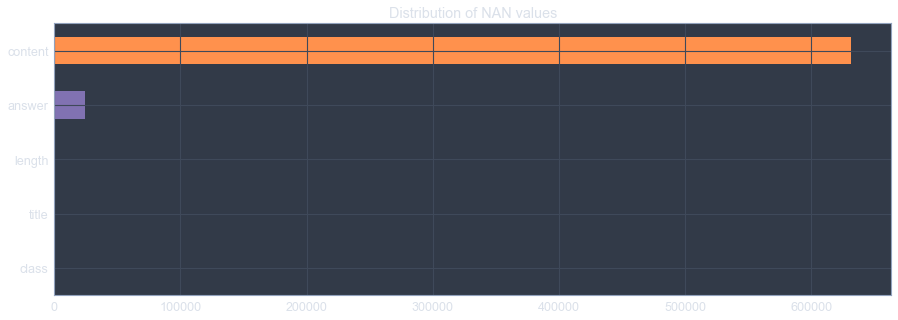

In [68]:
#explore NaN values
fig = plt.figure(figsize=(15, 5))
plt.title("Distribution of NAN values")
raw_data.isna().sum().sort_values(ascending = True).plot(kind = 'barh')
plt.show()

Entries with NaN :  631675


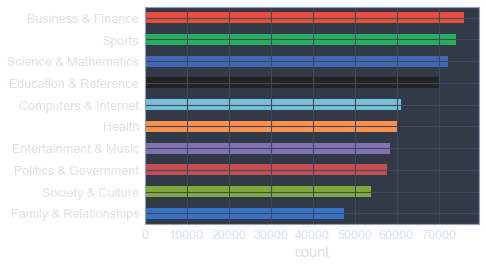

In [73]:
#check class distribution of NaN values as content
print( "Entries with NaN : ", raw_data['content'].isna().sum() )
data_isnull = raw_data[raw_data['content'].isnull()]

index = pd.Index(data_isnull['class'])
index.value_counts().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('count')
plt.show()


In [90]:
#Explore data without NaNs as question content
print( "Questions without NaN : ", raw_data['content'].notna().sum() )
data = raw_data[raw_data['content'].notnull()]

index = pd.Index(data['class']) 

print( index.value_counts() ) 
data.describe()

Questions without NaN :  768325
Family & Relationships    92409
Society & Culture         86080
Politics & Government     82238
Entertainment & Music     81536
Health                    79640
Computers & Internet      78944
Education & Reference     69812
Science & Mathematics     67706
Sports                    65922
Business & Finance        64038
Name: class, dtype: int64


,length
count,768325.000000
mean,212.402779
std,235.483443
min,1.000000
25%,66.000000
50%,138.000000
75%,267.000000
max,4000.000000


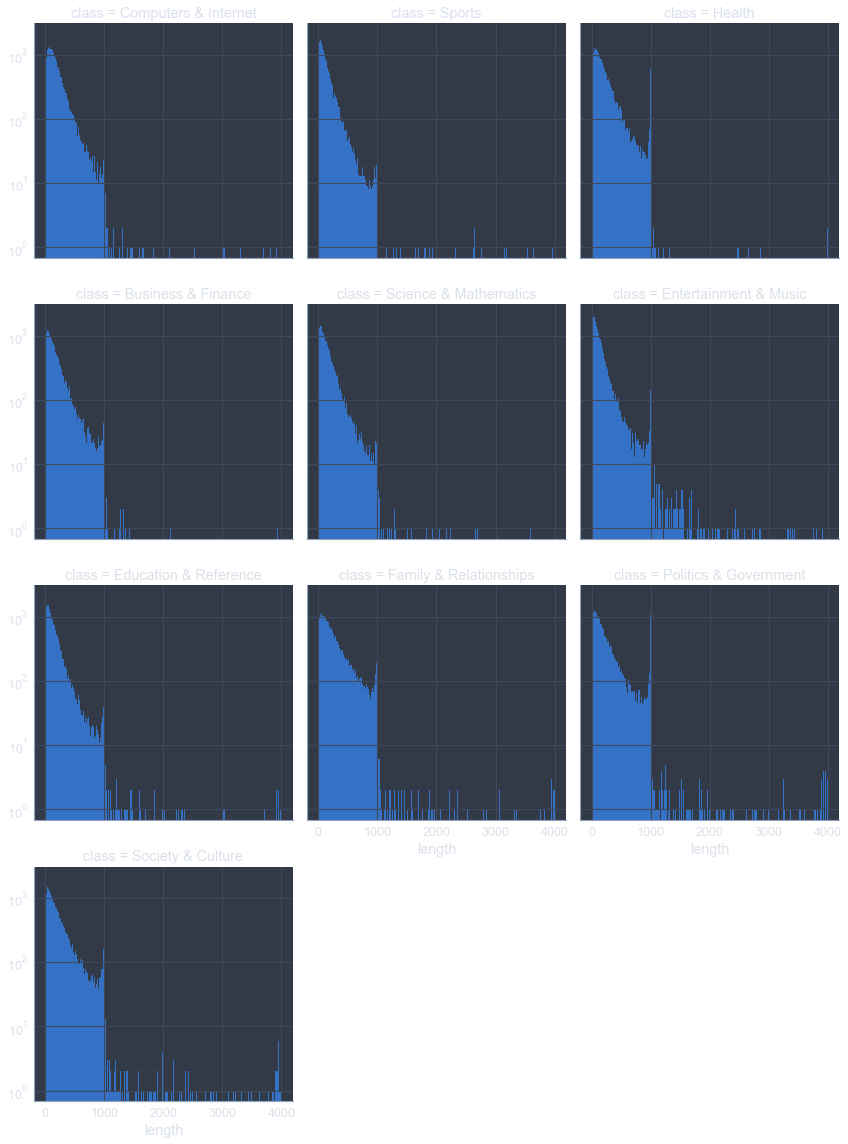

In [107]:
#distribution of question length per category
g = sns.FacetGrid(data=data, col='class', col_wrap=3, height=4)
g.map(plt.hist, 'length', bins=1000)
g.set( yscale="log" )       
plt.show()

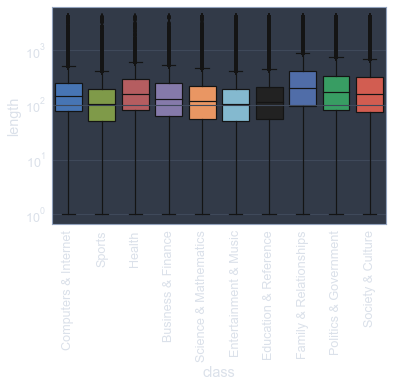

In [108]:
#boxplot of question lengths per category
g = sns.boxplot(x='class', y='length', data=data)
g.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

Title


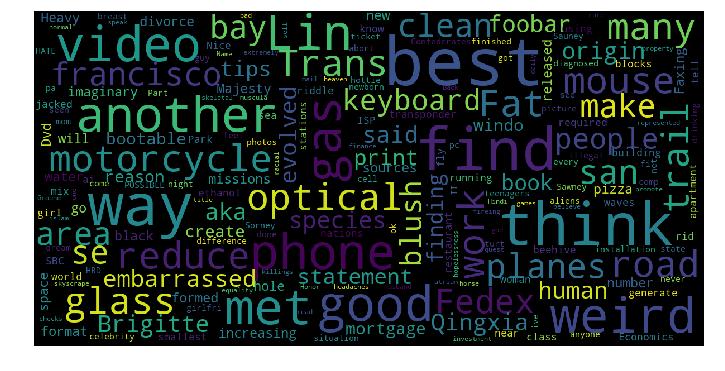

Question


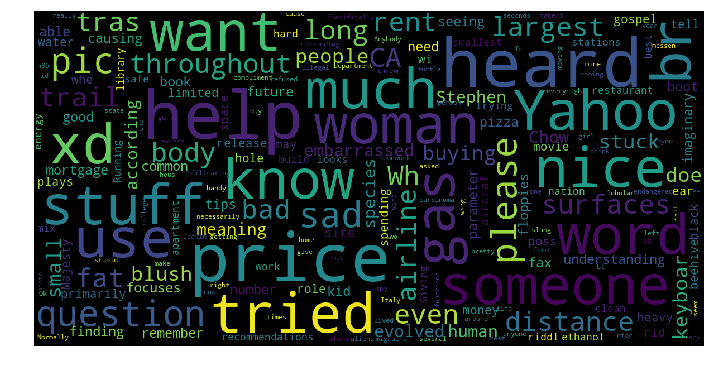

In [112]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    

print('Title')
show_wordcloud(data['title'])

print('Question')
show_wordcloud(data['content'])